In [1]:
import matplotlib.pyplot as plt
import math
plt.rcParams["figure.figsize"]=8,8
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import make_interp_spline, BSpline
plt.rcParams.update({'mathtext.default':  'regular' })

# Helium

Weighted Average d no phi: 3368.895337146892 $\pm$ 7.373743488443516
Average d no phi: 3335.2631362518905
Weighted Average d w phi: 3369.5856929824736 $\pm$ 7.388211867142484
Average d w phi: 3624.840982128479


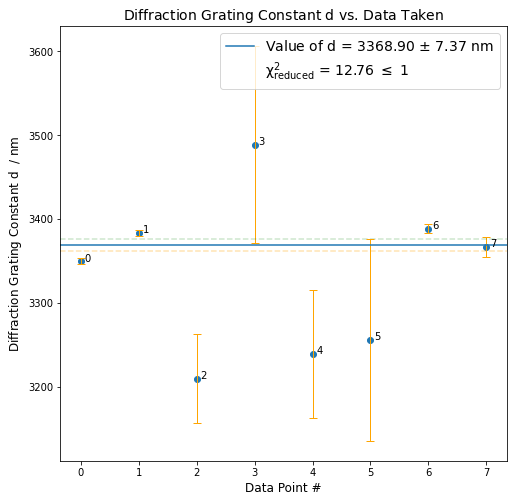

,m,alpha_1,alpha_2,color,lmba,delta,theta,bigphi,d_w_phi,d_no_phi,sigma_theta,sigma_big_phi,sigma_d,weight_d,weight_d_phi
0,1,11.50,11.50,red,667.8150,0.000000,0.200713,1.000000,3349.661027,3349.661027,0.000206,0.138289,3.386487,0.087197,7.231241
1,1,10.00,10.00,yellow,587.5620,0.000000,0.174533,1.000000,3383.634703,3383.634703,0.000206,0.121471,3.947079,0.064187,8.232430
2,1,8.78,9.20,green,501.5678,-0.003665,0.156905,1.043608,3349.757121,3209.785795,0.002600,194.914513,52.747214,0.000359,0.005130
3,1,7.72,8.50,cyan,492.1931,-0.006807,0.141546,1.210529,4223.415667,3488.899620,0.004818,958.338291,117.950393,0.000072,0.001043
4,1,7.67,8.20,blue,447.1479,-0.004625,0.138492,1.110795,3597.906990,3239.038276,0.003277,485.420548,76.149697,0.000172,0.002060
5,1,6.50,7.22,violet,388.8650,-0.006283,0.119730,1.332119,4336.890126,3255.633311,0.004448,1354.920300,120.359838,0.000069,0.000738
6,2,20.25,20.33,yellow,587.5620,-0.000698,0.354127,1.000063,3388.966040,3388.751562,0.000535,0.722181,4.901846,0.041618,1.384695
7,2,17.25,17.42,green,501.5678,-0.001484,0.302553,1.000533,3368.496183,3366.700796,0.001069,2.816765,11.530142,0.007522,0.355017


In [33]:
# SETUP AND BASIC CALCULATIONS
HeliumData = pd.read_excel("Lab2Data.xlsx",sheet_name="HeliumData")
HeliumData['delta'] = np.radians(0.5*(HeliumData['alpha_1']-HeliumData['alpha_2']))
HeliumData['theta'] = np.radians(0.5*(HeliumData['alpha_1']+HeliumData['alpha_2']))
HeliumData['bigphi'] = np.sqrt(1+(np.sin(HeliumData['delta'])/(np.cos(HeliumData['delta'])-np.cos(HeliumData['theta'])))**2)
HeliumData['d_w_phi'] = HeliumData['m']*HeliumData['lmba']*HeliumData['bigphi']/np.sin(HeliumData['theta'])
HeliumData['d_no_phi'] = HeliumData['m']*HeliumData['lmba']/np.sin(HeliumData['theta'])
# UNCERTAINTY
# error for each angle is 1 arcminute = 1/60 degrees
sigma_alpha = np.sqrt(np.radians(1/60)**2+HeliumData['delta']**2)
HeliumData['sigma_theta'] = np.sqrt(2*(0.5*np.sqrt(np.radians(1/60)**2+HeliumData['delta']**2))**2)
del_m_theta = np.cos(HeliumData['delta'])-np.cos(HeliumData['theta'])
sqrt_thing = np.sqrt((del_m_theta)**2+np.sin(HeliumData['delta'])**2)
HeliumData['sigma_big_phi'] = np.sqrt(\
(HeliumData['m']*HeliumData['lmba']*HeliumData['sigma_theta']*-1*(np.arctan(np.tan(HeliumData['theta']))*sqrt_thing/(np.sin(HeliumData['theta'])*del_m_theta)+np.sin(HeliumData['delta'])**2/((del_m_theta)**2 * sqrt_thing)))**2\
+(HeliumData['m']*HeliumData['lmba']*HeliumData['sigma_theta']*(np.sin(HeliumData['delta'])*(np.sin(HeliumData['delta'])**2+np.cos(HeliumData['delta'])*del_m_theta)/(np.sin(HeliumData['theta'])*del_m_theta**2 * sqrt_thing)))**2\
                                     )
HeliumData['sigma_d'] = np.sqrt((-HeliumData['m']*HeliumData['lmba']*HeliumData['sigma_theta']\
                                 /(np.tan(HeliumData['theta'])*np.sin(HeliumData['theta'])))**2)
HeliumData['weight_d'] = 1/HeliumData['sigma_d']**2
HeliumData['weight_d_phi'] = 1/np.sqrt(HeliumData['sigma_big_phi'])**2
weighted_d_no_phi = np.sum(HeliumData['weight_d']*HeliumData['d_no_phi'])/np.sum(HeliumData['weight_d'])
weighted_d_phi = np.sum(HeliumData['weight_d_phi']*HeliumData['d_w_phi'])/np.sum(HeliumData['weight_d_phi'])

n = len(HeliumData['sigma_d'])
variance_d_no_phi = (np.sum(HeliumData['weight_d']*(HeliumData['d_no_phi']-weighted_d_no_phi)**2)/np.sum(HeliumData['weight_d']))*(n/(n-1))
variance_d_phi = (np.sum(HeliumData['weight_d_phi']*(HeliumData['d_w_phi']-weighted_d_phi)**2)/np.sum(HeliumData['weight_d_phi']))*(n/(n-1))
std_error_d = np.sqrt(variance_d_no_phi/n)
std_error_d_phi = np.sqrt(variance_d_phi/n)

print("Weighted Average d no phi:", weighted_d_no_phi, "$\pm$", std_error_d) 
print("Average d no phi:",np.mean(HeliumData['d_no_phi']))
print("Weighted Average d w phi:", weighted_d_phi, "$\pm$", std_error_d_phi)
print("Average d w phi:",np.mean(HeliumData['d_w_phi']))



# plt.scatter(x=[0,1,2,3,4,5,6,7],y=HeliumData['d_w_phi'], label='Value of d w $\Phi$ = {:.2f} $\pm$ {:.2f}'.format(weighted_d_phi,std_error_d_phi))
plt.scatter(x=[0,1,2,3,4,5,6,7],y=HeliumData['d_no_phi'])
# m, b = np.polyfit([0,1,2,3,4,5,6,7],HeliumData['d_no_phi'],1)
chi_sqrd = np.sum((HeliumData['d_no_phi']-(weighted_d_no_phi))**2/HeliumData['sigma_d']**2)
rd_chi = chi_sqrd/(n-2)
plt.axhline(weighted_d_no_phi, label='Value of d = {:.2f} $\pm$ {:.2f} nm'.format(weighted_d_no_phi,std_error_d))
plt.axhline(weighted_d_no_phi+std_error_d,alpha=0.2,ls='--', color='green')
plt.axhline(weighted_d_no_phi-std_error_d,alpha=0.3,ls='--', color='orange')
for i in range(len(HeliumData['d_w_phi'])):
    plt.annotate(str(int([0,1,2,3,4,5,6,7][i])), xy=([0,1,2,3,4,5,6,7][i],HeliumData['d_no_phi'][i]), xytext=(4,0), 
                textcoords="offset points" )
# plt.errorbar([0,1,2,3,4,5,6,7],HeliumData['d_w_phi'],yerr=HeliumData['sigma_d'], capsize=4, ecolor='red', elinewidth=1, markeredgewidth=1, linestyle='None')
plt.errorbar([0,1,2,3,4,5,6,7],HeliumData['d_no_phi'],yerr=HeliumData['sigma_d'], capsize=4, ecolor='orange', elinewidth=1, markeredgewidth=1, linestyle='None')
plt.plot([],[], ' ', label='$\chi_{reduced}^2$ '+'= {:.2f} $\leq$ 1'.format(rd_chi))
plt.xlabel('Data Point #', fontsize=12)
plt.ylabel('Diffraction Grating Constant $d$  / $nm$', fontsize=12)
plt.title('Diffraction Grating Constant $d$ vs. Data Taken', fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.show()
HeliumData

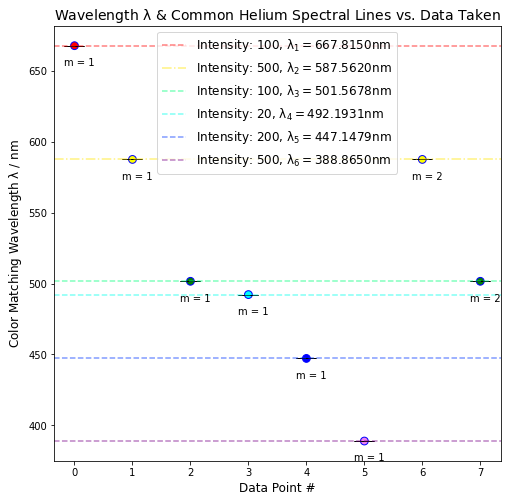

In [40]:
plt.scatter(x=[0,1,2,3,4,5,6,7],y=HeliumData['lmba'],color=HeliumData['color'], edgecolors='b', s=60)
plt.errorbar([0,1,2,3,4,5,6,7],HeliumData['lmba'],yerr=0.0001, capsize=10, ecolor='black', elinewidth=1, markeredgewidth=1, linestyle='None')
plt.axhline(667.8150, color='#ff0000', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_1= ${:.4f}nm '.format(100, 667.8150))
plt.axhline(587.5620, color='#ffe600', alpha=0.5, ls='-.', label='Intensity: {:n}, $\lambda_2 = ${:.4f}nm '.format(500, 587.5620))
plt.axhline(501.5678, color='#00ff7b', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_3 = ${:.4f}nm '.format(100, 501.5678))
plt.axhline(492.1931, color='#00ffea', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_4 = ${:.4f}nm '.format(20, 492.1931))
plt.axhline(447.1479, color='#0035ff', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_5 = ${:.4f}nm '.format(200, 447.1479))
plt.axhline(388.8650, color='#780088', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_6 = ${:.4f}nm '.format(500, 388.8650))
for i in range(len(HeliumData['lmba'])):
    plt.annotate("m = "+str(int(HeliumData['m'][i])), xy=([0,1,2,3,4,5,6,7][i],HeliumData['lmba'][i]), xytext=(-10,-20), 
                textcoords="offset points" )
plt.xlabel('Data Point #', fontsize=12)
plt.ylabel('Color Matching Wavelength $\lambda$ / $nm$', fontsize=12)
plt.title('Wavelength $\lambda$ & Common Helium Spectral Lines vs. Data Taken', fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.show()

# Hydrogen

theta systematic error:
0.00000%
Mean Rh 11015021.975689534 Error: 0.43094%
Real Rh 10967758
Mean 2R 10981730.841739746 Error: 0.12740%


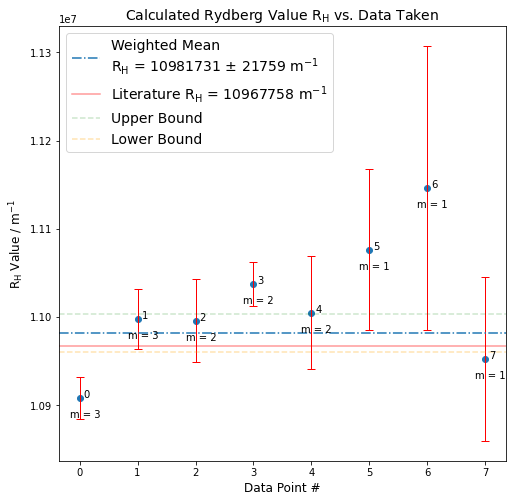

,m,alpha_1,alpha_2,color,delta,theta,sigma_theta,lmba,sigma_lmba,1/n1^2,n1,n1_rounded,n2minusn1,rydberg,sigma_rh,weight_rh
0,3,36.00,36.00,red,0.000000,0.628319,0.000206,660.062332,1.456761,0.111867,2.989846,3.0,0.138889,1.090806e+07,24074.146520,1.725433e-09
1,3,25.67,25.50,cyan,0.001484,0.446542,0.001069,484.952074,1.516238,0.061989,4.016454,4.0,0.187500,1.099765e+07,34384.961221,8.457907e-10
2,2,23.00,22.75,red,0.002182,0.399244,0.001556,654.781816,2.808554,0.110753,3.004845,3.0,0.138889,1.099603e+07,47165.243757,4.495271e-10
3,2,16.67,16.67,cyan,0.000000,0.290946,0.000206,483.198916,1.108471,0.061307,4.038737,4.0,0.187500,1.103755e+07,25320.441554,1.559759e-09
4,2,15.00,14.77,violet,0.002007,0.259792,0.001434,432.700559,2.519366,0.039285,5.045272,5.0,0.210000,1.100508e+07,64076.255709,2.435599e-10
5,1,11.25,11.00,red,0.002182,0.194168,0.001556,650.028752,5.337667,0.109735,3.018753,3.0,0.138889,1.107643e+07,90953.385988,1.208822e-10
6,1,8.33,8.00,cyan,0.002880,0.142506,0.002047,478.464959,6.905045,0.059440,4.101673,4.0,0.187500,1.114676e+07,160866.266576,3.864293e-11
7,1,7.50,7.33,violet,0.001484,0.129416,0.001069,434.773499,3.695813,0.040290,4.981971,5.0,0.210000,1.095261e+07,93103.178560,1.153642e-10


In [62]:
HydrogenData = pd.read_excel("Lab2Data.xlsx",sheet_name="HydrogenData")
# ANGLE CALCULATIONS
rh = 0.010967758
Rh = 10967758
LAMBDA_OFFSET = 0# -1

ALPHA1_OFFSET = 0 #0.27
ALPHA2_OFFSET = 0 #0.27
THETA_OFFSET = 0 #in degrees
HydrogenData = pd.read_excel("Lab2Data.xlsx",sheet_name="HydrogenData")
HydrogenData['delta'] = np.radians(0.5*(HydrogenData['alpha_1']+ALPHA1_OFFSET-HydrogenData['alpha_2']-ALPHA2_OFFSET))
HydrogenData['theta'] = np.radians(0.5*(HydrogenData['alpha_1']+ALPHA1_OFFSET+HydrogenData['alpha_2']+ALPHA2_OFFSET)+THETA_OFFSET) 
# UNCERTAINTY THETA
sigma_alpha = np.sqrt(np.radians(1/60)**2+HydrogenData['delta']**2)
n2 = len(HydrogenData['theta'])
HydrogenData['sigma_theta'] = np.sqrt(2*(0.5*sigma_alpha)**2)
# LAMBDA CALCULATION
HydrogenData['lmba'] = np.abs(weighted_d_no_phi*np.sin(HydrogenData['theta'])/HydrogenData['m']) + LAMBDA_OFFSET
print("theta systematic error:")
predict_error = np.arcsin(HydrogenData['m']*(HydrogenData['lmba']+LAMBDA_OFFSET)/weighted_d_no_phi)
error_diff = predict_error-HydrogenData['theta']
# print(np.degrees(HydrogenData['theta']))
# print(np.degrees(predict_error))
# print(np.degrees(error_diff))
# print(error_diff/HydrogenData['theta'])
print("{:.5%}".format(np.mean(error_diff/HydrogenData['theta'])))
# UNCERT LAMBDA
HydrogenData['sigma_lmba'] = np.sqrt((np.sin(HydrogenData['theta'])*std_error_d/HydrogenData['m'])**2+(weighted_d_no_phi*np.cos(HydrogenData['theta'])*HydrogenData['sigma_theta']/HydrogenData['m'])**2)
# CALCULATION RYDBERG
HydrogenData['1/n1^2'] = -1/(rh*HydrogenData['lmba'])+1/4
HydrogenData['n1'] = np.sqrt(1/HydrogenData['1/n1^2'])
HydrogenData['n1_rounded'] = HydrogenData['n1'].round(0)
HydrogenData['n2minusn1'] = 1/4-1/HydrogenData['n1_rounded']**2
HydrogenData['rydberg'] = (1/(HydrogenData['n2minusn1']*HydrogenData['lmba']))*1e9
# UNCERT RYDBERG
HydrogenData['sigma_rh'] = np.sqrt((-HydrogenData['sigma_lmba']* 1e9/(HydrogenData['lmba']**2*HydrogenData['n2minusn1']) )**2 ) 
HydrogenData['weight_rh'] = 1/(HydrogenData['sigma_rh'])**2
# MEAN RYDBERG
mean_rydberg = np.mean(HydrogenData['rydberg'])
weighted_mean_rydberg = np.sum(HydrogenData['weight_rh']*HydrogenData['rydberg'])/np.sum(HydrogenData['weight_rh'])
print("Mean Rh", mean_rydberg, "Error: {:.5%}".format(np.abs((mean_rydberg-Rh)/Rh)))
print("Real Rh", Rh)
print("Mean 2R", weighted_mean_rydberg, "Error: {:.5%}".format(np.abs((weighted_mean_rydberg-Rh)/Rh)))
# STD ERROR RYDBERG 
variance_rh = (np.sum(HydrogenData['weight_rh']*(HydrogenData['rydberg']-weighted_mean_rydberg)**2)/np.sum(HydrogenData['weight_rh']))*(n2/(n2-1))
std_error_rh = np.sqrt(variance_rh/n2)
# PLOT VISUAL
plt.xlabel('Data Point #', fontsize=12)
plt.ylabel('$R_H$ Value / $m^{-1}$', fontsize=12)
plt.title('Calculated Rydberg Value $R_H$ vs. Data Taken', fontsize=14)
plt.scatter(x=[0,1,2,3,4,5,6,7],y=HydrogenData['rydberg'])
for i in range(len(HydrogenData['rydberg'])):
    plt.annotate(str(int([0,1,2,3,4,5,6,7][i])), xy=([0,1,2,3,4,5,6,7][i],HydrogenData['rydberg'][i]), xytext=(4,0), 
                textcoords="offset points" )
for i in range(len(HydrogenData['rydberg'])):
    plt.annotate("m = "+str(int(HydrogenData['m'][i])), xy=([0,1,2,3,4,5,6,7][i],HydrogenData['rydberg'][i]), xytext=(-10,-20), 
                textcoords="offset points" )
plt.errorbar([0,1,2,3,4,5,6,7],HydrogenData['rydberg'],yerr=HydrogenData['sigma_rh'], capsize=4, ecolor='red', elinewidth=1, markeredgewidth=1, linestyle='None')
# m2, b2 = np.polyfit([0,1,2,3,4,5,6,7],HydrogenData['rydberg'],1)
chi_sqrd2 = np.sum((HydrogenData['rydberg']-weighted_mean_rydberg)**2/HydrogenData['sigma_rh']**2)
rd_chi2 = chi_sqrd2/(n2-2)
# plt.plot([0,1,2,3,4,5,6,7],np.array([0,1,2,3,4,5,6,7])*m2+b2,'--',alpha=0.4,label='General Trend\ny = {:.1f}x + {:.0f}'.format(m2,b2)+' $m^{-1}$')
plt.axhline(weighted_mean_rydberg, ls='-.', label='Weighted Mean \n$R_H$ = {:.0f} $\pm$ {:.0f}'.format(weighted_mean_rydberg, std_error_rh)+' $m^{-1}$')
plt.axhline(Rh, color='red', alpha=0.4, label='Literature $R_H$ = {:.0f}'.format(Rh)+' $m^{-1}$')
plt.axhline(weighted_mean_rydberg+std_error_rh, color='green', ls='--', alpha=0.2, label="Upper Bound")
plt.axhline(weighted_mean_rydberg-std_error_rh, color='orange', ls='--', alpha=0.3, label="Lower Bound")

# plt.plot([],[], ' ', label='$\chi_{reduced}^2$ '+'= {:.2f} $\leq$ 1'.format(rd_chi2))
plt.legend(loc='best',fontsize=14)
plt.show()
HydrogenData
# HeliumData['d_no_phi'] = HeliumData['m']*HeliumData['lmba']/np.sin(HeliumData['theta'])

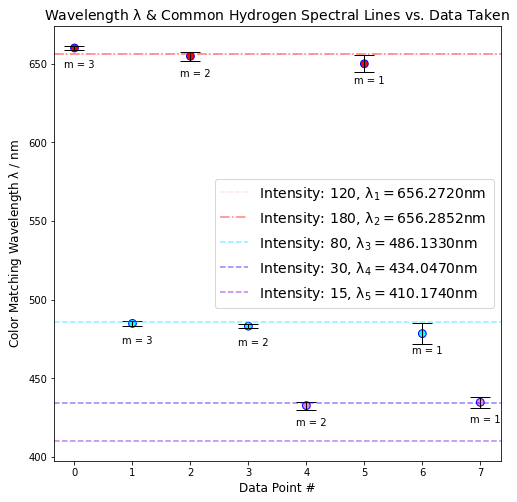

In [59]:
plt.scatter(x=[0,1,2,3,4,5,6,7],y=HydrogenData['lmba'],color=HydrogenData['color'], edgecolors='b', s=60)
plt.errorbar([0,1,2,3,4,5,6,7],HydrogenData['lmba'],yerr=HydrogenData['sigma_lmba'], capsize=10, ecolor='black', elinewidth=1, markeredgewidth=1, linestyle='None')
plt.axhline(656.272, color='#ff0000', alpha=0.1, ls='--', label='Intensity: {:n}, $\lambda_1= ${:.4f}nm '.format(120, 656.272))
plt.axhline(656.2852, color='#ff0000', alpha=0.5, ls='-.', label='Intensity: {:n}, $\lambda_2 = ${:.4f}nm '.format(180, 656.2852))
plt.axhline(486.133, color='#00efff', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_3 = ${:.4f}nm '.format(80, 486.133))
plt.axhline(434.047, color='#2800ff', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_4 = ${:.4f}nm '.format(30, 434.047))
plt.axhline(410.174, color='#7d00db', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_5 = ${:.4f}nm '.format(15, 410.174))
plt.xlabel('Data Point #', fontsize=12)
for i in range(len(HydrogenData['lmba'])):
    plt.annotate("m = "+str(int(HydrogenData['m'][i])), xy=([0,1,2,3,4,5,6,7][i],HydrogenData['lmba'][i]), xytext=(-10,-20), 
                textcoords="offset points" )
plt.ylabel('Color Matching Wavelength $\lambda$ / $nm$', fontsize=12)
plt.title('Wavelength $\lambda$ & Common Hydrogen Spectral Lines vs. Data Taken', fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.show()

# Helium-Neon

In [76]:
HeNeData = pd.read_excel("Lab2Data.xlsx",sheet_name="HeNeData")
# CALCULATIONS
HeNeData['delta'] = np.radians(0.5*(HeNeData['alpha_1']-HeNeData['alpha_2']))
HeNeData = HeNeData.drop('lmba', axis=1)
HeNeData['theta'] = np.radians(0.5*(HeNeData['alpha_1']+HeNeData['alpha_2']))
HeNeData['lmba_calc'] = np.abs(weighted_d_no_phi*np.sin(HeNeData['theta'])/HeNeData['m'])
# UNCERTAINTY CALCULATIONS
sigma_alpha = np.sqrt(np.radians(1/60)**2+HeNeData['delta']**2)
HeNeData['sigma_theta'] = np.sqrt(2*(0.5*sigma_alpha)**2)
HeNeData['sigma_lmba'] = np.sqrt((np.sin(HydrogenData['theta'])*std_error_d/HydrogenData['m'])**2+(weighted_d_no_phi*np.cos(HydrogenData['theta'])*HydrogenData['sigma_theta']/HydrogenData['m'])**2)
HeNeData['weight_lmba'] = 1/HeNeData['sigma_lmba']**2
n3 = len(HeNeData['m'])
weighted_mean_lmba = np.sum(HeNeData['weight_lmba']*HeNeData['lmba_calc'])/np.sum(HeNeData['weight_lmba'])
variance_lmba = (np.sum(HeNeData['weight_lmba']*(HeNeData['lmba_calc']-weighted_mean_lmba)**2)/np.sum(HeNeData['weight_lmba']))*(n3/(n3-1))
std_error_lmba = np.sqrt(variance_lmba/n3)
print(weighted_mean_lmba, "+-", std_error_lmba)
print('{:.4%}'.format(np.abs((weighted_mean_lmba-632.8)/632.8)))
HeNeData

631.9708439042136 +- 3.5894369726249367
0.1310%


,m,alpha_1,alpha_2,color,delta,theta,lmba_calc,sigma_theta,sigma_lmba,weight_lmba
0,1,10.5,11.00,red,-0.004363,0.187623,628.379955,0.003092,1.456761,0.471220
1,2,22.0,22.50,red,-0.004363,0.388336,637.813781,0.003092,1.516238,0.434976
2,3,33.5,34.17,red,-0.005847,0.590532,625.270491,0.004139,2.808554,0.126775


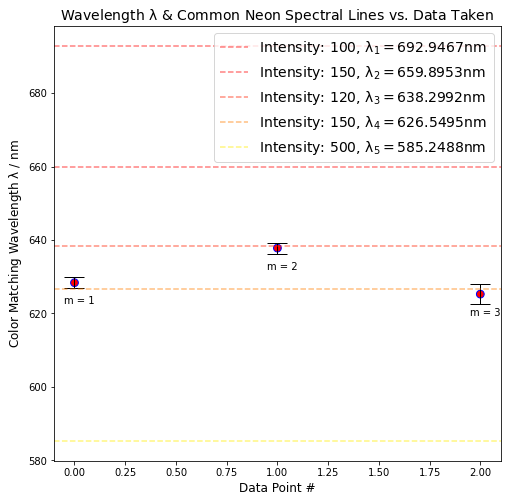

In [64]:
plt.scatter(x=[0,1,2],y=HeNeData['lmba_calc'],color=HeNeData['color'], edgecolors='b', s=60)
plt.errorbar([0,1,2],HeNeData['lmba_calc'],yerr=HeNeData['sigma_lmba'], capsize=10, ecolor='black', elinewidth=1, markeredgewidth=1, linestyle='None')
plt.axhline(692.9467, color='#ff0000', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_1= ${:.4f}nm '.format(100, 692.9467))
plt.axhline(659.8953, color='#ff0000', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_2 = ${:.4f}nm '.format(150, 659.8953))
plt.axhline(638.2992, color='#ff2100', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_3 = ${:.4f}nm '.format(120, 638.2992))
plt.axhline(626.5495, color='#ff7e00', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_4 = ${:.4f}nm '.format(150, 626.5495))
plt.axhline(585.2488, color='#ffef00', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_5 = ${:.4f}nm '.format(500, 585.2488))
plt.xlabel('Data Point #', fontsize=12)
for i in range(len(HeNeData['lmba'])):
    plt.annotate("m = "+str(int(HeNeData['m'][i])), xy=([0,1,2][i],HeNeData['lmba'][i]), xytext=(-10,-20), 
                textcoords="offset points" )
plt.ylabel('Color Matching Wavelength $\lambda$ / $nm$', fontsize=12)
plt.title('Wavelength $\lambda$ & Common Neon Spectral Lines vs. Data Taken', fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.show()

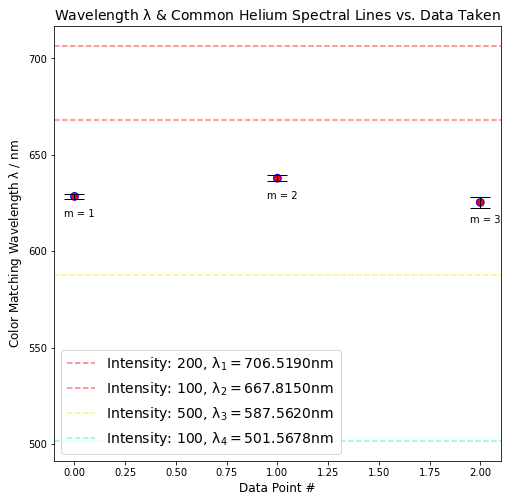

In [65]:
plt.scatter(x=[0,1,2],y=HeNeData['lmba_calc'],color=HeNeData['color'], edgecolors='b', s=60)
plt.errorbar([0,1,2],HeNeData['lmba_calc'],yerr=HeNeData['sigma_lmba'], capsize=10, ecolor='black', elinewidth=1, markeredgewidth=1, linestyle='None')
plt.axhline(706.519, color='#f20000', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_1 = ${:.4f}nm '.format(200, 706.519))
plt.axhline(667.815, color='#ff0000', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_2 = ${:.4f}nm '.format(100, 667.815))
plt.axhline(587.562, color='#ffe600', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_3 = ${:.4f}nm '.format(500, 587.562))
plt.axhline(501.5678, color='#00ff7b', alpha=0.5, ls='--', label='Intensity: {:n}, $\lambda_4 = ${:.4f}nm '.format(100, 501.5678))
plt.xlabel('Data Point #', fontsize=12)
for i in range(len(HeNeData['lmba'])):
    plt.annotate("m = "+str(int(HeNeData['m'][i])), xy=([0,1,2][i],HeNeData['lmba'][i]), xytext=(-10,-20), 
                textcoords="offset points" )
plt.ylabel('Color Matching Wavelength $\lambda$ / $nm$', fontsize=12)
plt.title('Wavelength $\lambda$ & Common Helium Spectral Lines vs. Data Taken', fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.show()